# Understanding outliers

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from lightgbm import LGBMRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PowerTransformer

C:\Users\sit_k\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv('./data/features.csv', index_col=0)

In [3]:
target = train['loss']
feature = train.drop(['loss'], axis=1)

In [4]:
mod = TransformedTargetRegressor(
    regressor=LGBMRegressor(), transformer=PowerTransformer())
mod_fit = mod.fit(feature, target)
pred = mod_fit.predict(feature)

In [5]:
train['pred'] = pred
train['diff'] = train['pred'] - train['loss']

In [6]:
train['log_loss'] = np.log(train[['loss']])
train['log_pred'] = np.log(train['pred'])

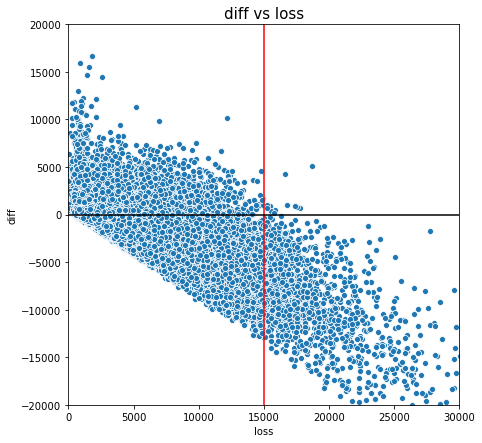

In [16]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x='loss', y='diff', data=train)
plt.title('diff vs loss', fontsize=15)
plt.axvline(15000, color='r')
plt.axhline(0, color = 'black')
plt.xlim(0, 30000)
plt.ylim(-20000, 20000)
plt.show()

**Observation**: Once pass 15K, predictions are mainly under estimated.

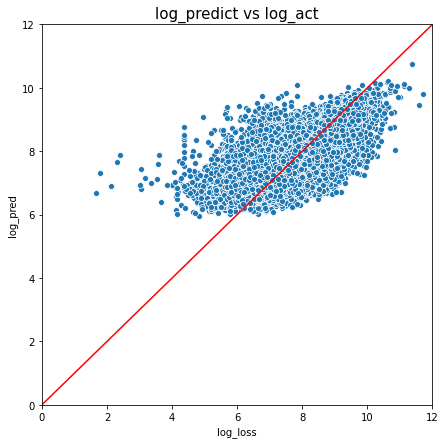

In [8]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x='log_loss', y='log_pred', data=train)
plt.title('log_predict vs log_act', fontsize=15)
X_plot = np.linspace(0, 12)
Y_plot = X_plot
plt.plot(X_plot, Y_plot, color='r')
plt.xlim(0, 12)
plt.ylim(0, 12)
plt.show()

**Observation**: Appear that the model skew toward under predicting loss values

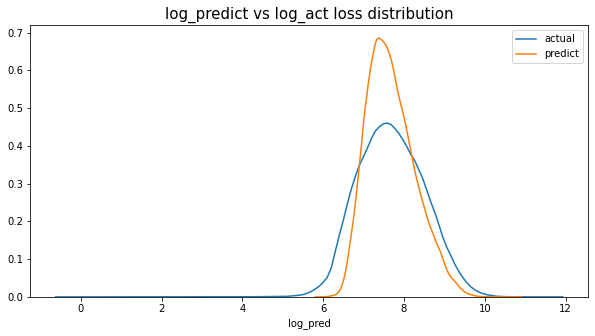

In [9]:
plt.figure(figsize=(10, 5))
sns.distplot(train['log_loss'], label='actual', hist=False)
sns.distplot(train['log_pred'], label='predict', hist=False)
plt.title('log_predict vs log_act loss distribution', fontsize=15)
plt.legend(loc='best')
plt.show()

**Observation**: weak linear pattern observed. Overall model has a smaller values range than actuals.

In [10]:
train['diff'].describe()

count    188318.000000
mean       -413.433204
std        1913.857337
min     -102645.390718
25%        -936.685427
50%         -35.787340
75%         519.993491
max       21189.478884
Name: diff, dtype: float64

**Observartion**: under predictions can go as low as -100K while over prediction can go as high as 21K.

**Conclusion**:

Models appear to over predict loss values for small claims and under predict for high value claim. Future investigation on the features are needed to understand the root cause, but we will need definitions of the variables